In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt


medi_df = pd.read_csv('Database of Medicine Prices 05 May 2018.csv')
medi_df.head()

,applicants_mcc_licence_no,applicant_name,mcc_medicine_reg_no,nappi_code,atc_4,medicine_schedule,medicine_proprietary_name,active_ingredients,strength,unit,...,quantity,manufacturer_price,logistics_fee,vat,sep,unit_price,effective_date,status,originator_or_generic,_12_months_volume_of_sales
0,1154.0,3M South Africa (Pty) Ltd,U/4/104,703312001.0,N01BA,S4,Xylestesin-A,Lidocaine hydrochloride,20.000,mg/ml,...,1.0,189.10,31.00,33.02,253.12,5.06,01 April 2018,NaN,Originator,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenaline,0.012,mg/ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1154.0,3M South Africa (Pty) Ltd,A38/4/0430,710488001.0,N01BB,S4,Ubistesin,Articaine hydrochloride,40.000,mg/ml,...,1.0,229.91,37.70,40.14,307.76,6.16,01 April 2018,NaN,Originator,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adrenaline,0.010,mg/ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1154.0,3M South Africa (Pty) Ltd,A38/4/0431,710497001.0,N01BB,S4,Ubistesin Forte,Articaine hydrochloride,40.000,mg/ml,...,1.0,229.91,37.70,40.14,307.76,6.16,01 April 2018,NaN,Originator,NaN


In [8]:
# list all the columns in the dataset.
medi_df.columns

Index(['applicants_mcc_licence_no', 'applicant_name', 'mcc_medicine_reg_no',
       'nappi_code', 'atc_4', 'medicine_schedule', 'medicine_proprietary_name',
       'active_ingredients', 'strength', 'unit', 'dosage_form', 'pack_size',
       'quantity', 'manufacturer_price', 'logistics_fee', 'vat', 'sep',
       'unit_price', 'originator_or_generic'],
      dtype='object')

After just running the first 5 rows of the data set we see that they are many null values. Next let us plot a heatmap to check for all null values.

Text(0.5, 1.0, 'Heatmap of null values')

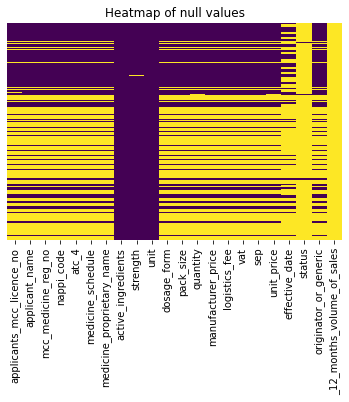

In [3]:
#using the seaborn library to plot a heatmap for all null values
sns.heatmap(medi_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap of null values")

The heatmap shows us that the dataset contains many null values. Because it is a big dataset and the data is MCAR we can drop all the rows with the null values. We can start by droping the "effective_date", "status" and "_12_months_volume_of_sales" coloumns because they contain the most with null values.

In [4]:
#drop the 3 coloumns
medi_df = medi_df.drop(["effective_date", "status", "_12_months_volume_of_sales"], axis=1)

Next we can drop all the rows in the dataset that contain null values

In [5]:
# drop all rows with null values
medi_df = medi_df.dropna()

Now let us check for any null values by plotting a heatmap and using the isnulls().sum function.

Text(0.5, 1.0, 'Heatmap of null values')

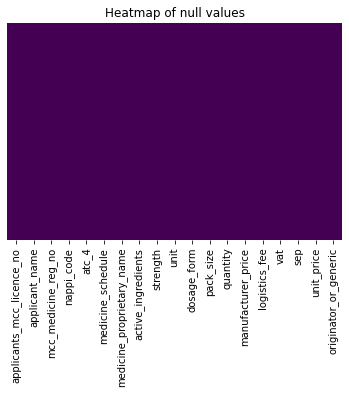

In [6]:
#using the seaborn library to plot a heatmap for all null values
sns.heatmap(medi_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap of null values")

In [7]:
# check for null values
medi_df.isnull().sum()

applicants_mcc_licence_no    0
applicant_name               0
mcc_medicine_reg_no          0
nappi_code                   0
atc_4                        0
medicine_schedule            0
medicine_proprietary_name    0
active_ingredients           0
strength                     0
unit                         0
dosage_form                  0
pack_size                    0
quantity                     0
manufacturer_price           0
logistics_fee                0
vat                          0
sep                          0
unit_price                   0
originator_or_generic        0
dtype: int64

Now that our dataset does not contain any null values we can start analyzing the data.

In [10]:
# Concise summary about dataset. This will help us understand the dataframe even more by knowing the type of data type it is.
medi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 997
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   applicants_mcc_licence_no  456 non-null    float64
 1   applicant_name             456 non-null    object 
 2   mcc_medicine_reg_no        456 non-null    object 
 3   nappi_code                 456 non-null    float64
 4   atc_4                      456 non-null    object 
 5   medicine_schedule          456 non-null    object 
 6   medicine_proprietary_name  456 non-null    object 
 7   active_ingredients         456 non-null    object 
 8   strength                   456 non-null    float64
 9   unit                       456 non-null    object 
 10  dosage_form                456 non-null    object 
 11  pack_size                  456 non-null    float64
 12  quantity                   456 non-null    float64
 13  manufacturer_price         456 non-null    object 

The coloumns "manufacturer_price", "logistics_fee", "vat", "unit_price" and "sep" should have a datatype of float and not object because they all contain numerical values. We have to then change the datatypes of these columns from object to float.

In [13]:
col = ["manufacturer_price","logistics_fee","vat","unit_price","sep"]

# Next we are going to convert the datatype from "object" to "float" for all these columns
medi_df[col]  = medi_df[col] .apply( pd.to_numeric, errors='coerce' )

In [14]:
# Get basic statistical details about the document
medi_df.describe()

,applicants_mcc_licence_no,nappi_code,strength,pack_size,quantity,manufacturer_price,logistics_fee,vat,sep,unit_price
count,456.000000,4.560000e+02,456.000000,456.000000,456.000000,407.000000,454.000000,445.000000,400.000000,446.000000
mean,736.550439,7.348739e+08,134.133215,564.843202,19.289474,194.124840,47.828855,59.340652,232.348575,29.284910
std,336.078630,4.165215e+07,442.842008,1220.567863,140.162259,185.519435,106.522592,111.677893,208.474207,94.577855
min,125.000000,7.006420e+08,0.029000,0.500000,1.000000,7.250000,0.840000,1.210000,9.310000,0.000000
25%,665.000000,7.109328e+08,5.000000,10.000000,1.000000,69.355000,8.082500,12.120000,87.872500,0.160000
50%,665.000000,7.170670e+08,24.500000,30.000000,1.000000,131.320000,16.825000,25.800000,159.160000,3.750000
75%,985.000000,7.237343e+08,102.500000,200.000000,2.000000,256.130000,37.282500,51.750000,311.117500,16.785000
max,1154.000000,8.941840e+08,8232.000000,5000.000000,2000.000000,932.660000,899.500000,928.050000,986.130000,822.150000


Text(0.5, 1.0, 'Heatmap of all columns with numerical values')

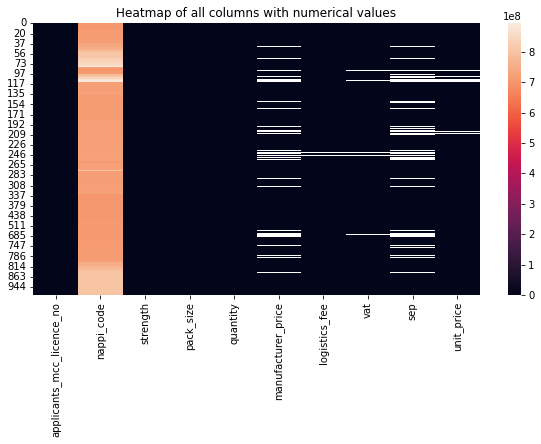

In [27]:
# store all columns in a list
cols = ["applicants_mcc_licence_no", "nappi_code", "strength", "pack_size", "quantity", "manufacturer_price", "logistics_fee", "vat", "sep", "unit_price"]

plt.figure(figsize = (10,5))
sns.heatmap(medi_df[cols])
plt.title("Heatmap of all columns with numerical values")

The above heatmap shows us how the data is distributed in all the columns and which columns have the highest values. The Nappi code, SEP and Manufacturer price have the highest values in the dataset based solely on looking at the above visulization.

Text(0.5, 1.0, 'Companies and how many times they applied')

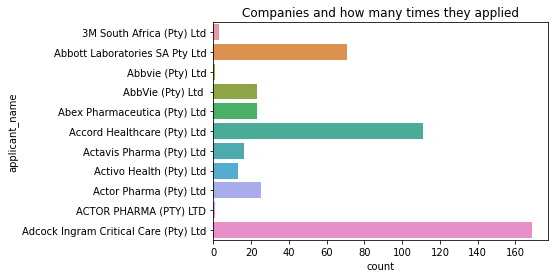

In [108]:
# check how many companies and how many 
sns.countplot(y='applicant_name', data = medi_df)
plt.title("Companies and how many times they applied")

The above visulization shows us how many companies they are and also how many times they ahev applied to recieve medication. The most common company fount in this visulization is Adclock Ingram Care which has more than 170 applications followed by Accord Healthcare with more than 110 applications and finally Addott Labrotories with more then 70 applications.

Text(0.5, 1.0, 'Manufacturer price of medicines')

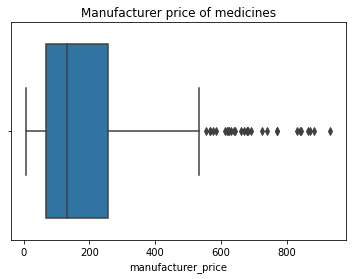

In [109]:
# box plot for manufacturer price
sns.boxplot(x = medi_df["manufacturer_price"])
plt.title("Manufacturer price of medicines")

The most common manufacturer price are mostly between 80 and 260 with multiple outliers ranging from 550 and even a maximum of 1000.

Text(0.5, 1.0, 'Prices for the different Medicines')

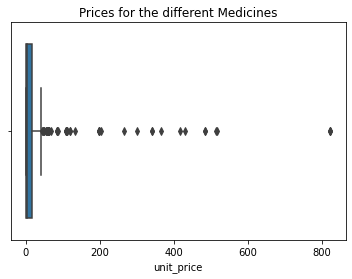

In [102]:
# boxplot for unit price
sns.boxplot(x = medi_df["unit_price"])
plt.title("Prices for the different Medicines")

The above visulization shows that on average the unit price is very checp and below 30. The box plot shows multiple outliers ranging from 50 to a maximum of about 820.

Text(0.5, 1.0, 'Unit Price Vs Manufacturer Price')

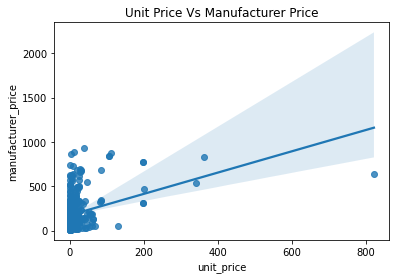

In [70]:
# see how the unit price of the medicine compares to the amount of manufacturer_price
sns.regplot(x=medi_df["unit_price"], y=medi_df["manufacturer_price"])
plt.title("Unit Price Vs Manufacturer Price")

The above visulization shows that they is a direct relationship between the Unit Price and Manufacturer Price. The higher the Unit Price the higher the Manufacturer Price.

Text(0.5, 1.0, 'Unit Price Vs Vat')

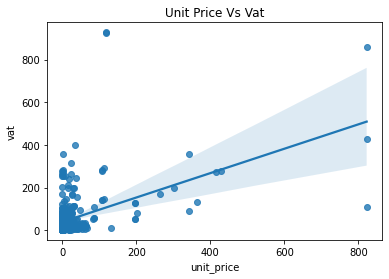

In [72]:
# see how the price of the medicine compares to the amount of vat paid
sns.regplot(x=medi_df["unit_price"], y=medi_df["vat"])
plt.title("Unit Price Vs Vat")

Just like the Unit Price and Manufacturer price the Unit Price and the Vat price have a direct relationship.

Text(0.5, 1.0, 'SEP of medicines')

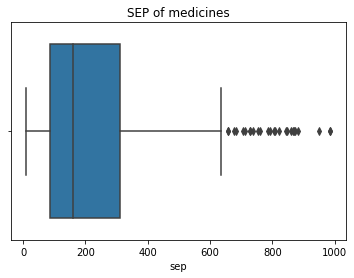

In [65]:
# box plot for sep
sns.boxplot(x = medi_df["sep"])
plt.title("SEP of medicines")

The average SEP for the dataset rangest from 100 to about 300. The SEP column also contains multiple outliers with the most highest values ranging from 800 to about 1000.

Text(0.5, 1.0, 'NUmber of Originator and Generic medications')

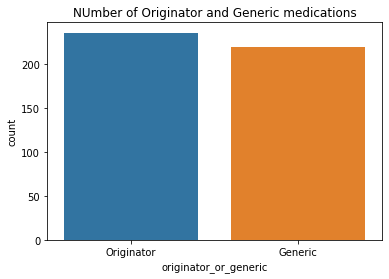

In [78]:
# remove trailing white spaces
medi_df["originator_or_generic"] = medi_df["originator_or_generic"].str.strip()

medi_df = medi_df.replace("originator","Originator")

# check how the data is distributed.
sns.countplot(x = medi_df["originator_or_generic"])
plt.title("NUmber of Originator and Generic medications")


This visualization contains only 2 different types of medication (Originator and Generic medications). The two types of medication have a similar count with the originator having a slightly higher value than the generic mediation.

Text(0.5, 1.0, 'Top 10 Active Ingredients')

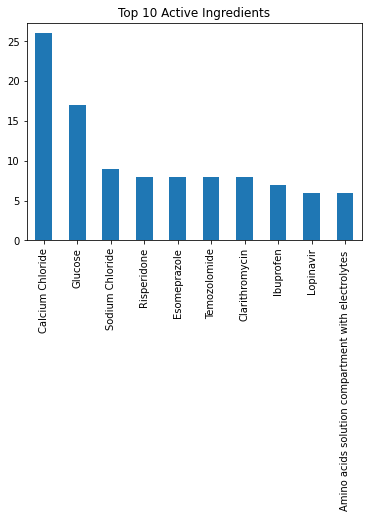

In [46]:
# get the top 10 values in the column active_ingredients
ingredients_top10 = medi_df["active_ingredients"].value_counts()[:10]
ingredients_top10.plot(kind="bar")
plt.title("Top 10 Active Ingredients")

Because we have a very big dataset I have only plotted the top 10 highest values in the Active Ingredients column. The Calcium Chloride is the most common ingredient and is found in more than 25 medicatons followed by glucose which is found in about 17 different types of medication. 

Text(0.5, 1.0, 'Top 10 common medicines')

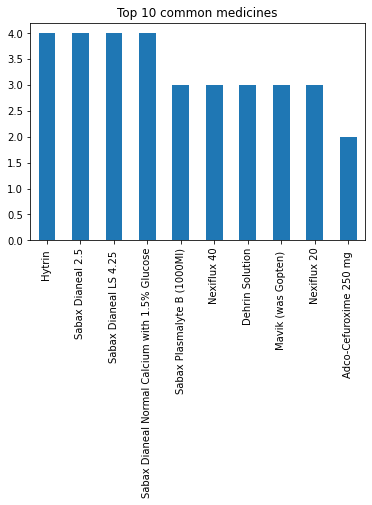

In [105]:
# get the top 10 values in the column medicine_proprietary_name
medi_name = medi_df["medicine_proprietary_name"].value_counts()[:10]
medi_name.plot(kind="bar")
plt.title("Top 10 common medicines")

The 4 most common medications are Hytrim, Sabax Dianeal 2.5, Sabax Dianeal LS 4.25  and Sabax Dianeal Normal Calcium with 1.5%. The next 5 most common medications are Nexiflux 40, Dehrin Solution, Mavik (was Gopten) and Nexiflux 20. 

Text(0.5, 1.0, 'Top 5 most common dosages of medicine')

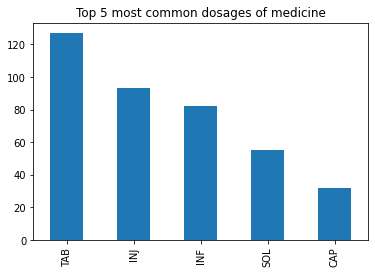

In [107]:
dosage = medi_df["dosage_form"].value_counts()[:5]
dosage.plot(kind="bar")
plt.title("Top 5 most common dosages of medicine")

TAB is the most common medication dose found more than 120 times followed by INJ found more than 90 times and INF found more than 80 times.

Text(0.5, 1.0, 'Pie chart of Medicine Schedules')

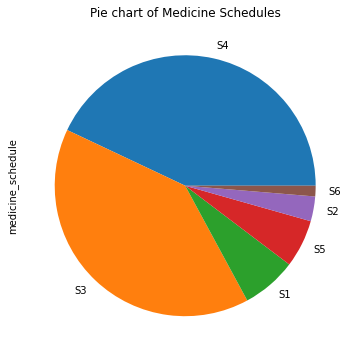

In [100]:
medicine_schedule_count = medi_df["medicine_schedule"].value_counts()

plt.figure(figsize=(6,6))
medicine_schedule_count.plot(kind='pie')
plt.title("Pie chart of Medicine Schedules")

The above pie chart shows the most common medicine schedule. The S3 and S4 are the most common medicine sedules and both have a combined value of over 75% of the whole pie chart, with each havin a value of about 37.5%. Followed by S1 with about 10% of the pie chart.

Text(0.5, 1.0, 'Box plot of logistic fees')

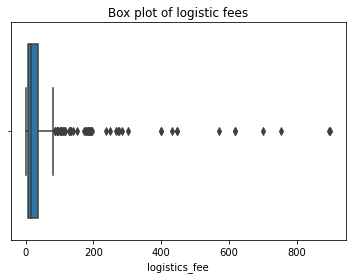

In [116]:
# boxplot for logistic fees
sns.boxplot(x = medi_df["logistics_fee"])
plt.title("Box plot of logistic fees")

This box plot visulaization shows us that the average logistic fees are less than 50. Just like the unit price box plot, this visualization shows us that there are also multiple outliers ranging from 100 to 1000.